In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style") 
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


# Pandas

In [3]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/ref_optv1_sigext_ref_only_skim/'

base_filter =  'D0_M>1.82 && D0_M<1.91 '
# base_filter += '&& Dstarp_isSignal==1'
tree = 'ref_rho'

variables=["__experiment__", "__run__", "__event__",'D0_M','Dstarp_Q','Dstarp_CMS_p','__ncandidates__','Dstarp_isSignal','Dstarp_chiProb']
var = 'D0_M'

In [4]:
# ccbar_0 = base_file_loc + 'topo/resultfile/result_ref_rho/standard.root'

# uubar_0 = base_file_loc + 'generic_uubar.root'
# ddbar_0 = base_file_loc + 'generic_ddbar.root'
# ssbar_0 = base_file_loc + 'generic_ssbar.root'
# charged_0 = base_file_loc + 'generic_charged.root'
# mixed_0 = base_file_loc + 'generic_mixed.root'
# taupair_0 = base_file_loc + 'generic_taupair.root'

ccbar_0 = base_file_loc + 'ccbar/recon_*.root'

uubar_0 = base_file_loc + 'uubar/recon_*.root'
ddbar_0 = base_file_loc + 'ddbar/recon_*.root'
ssbar_0 = base_file_loc + 'ssbar/recon_*.root'
charged_0 = base_file_loc + 'charged/recon_*.root'
mixed_0 = base_file_loc + 'mixed/recon_*.root'
taupair_0 = base_file_loc + 'taupair/recon_*.root'

In [5]:
base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar_0 = get_pd(file=ccbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_uubar_0 = get_pd(file=uubar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_ddbar_0 = get_pd(file=ddbar_0, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=ssbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_charged_0 = get_pd(file=charged_0, tree=tree,base_filter=base_filter,variables=variables)

pd_mixed_0 = get_pd(file=mixed_0, tree=tree,base_filter=base_filter,variables=variables)

pd_taupair_0 = get_pd(file=taupair_0, tree=tree,base_filter=base_filter,variables=variables)


In [6]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)


In [7]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uubar['rank'] = pd_uubar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ddbar['rank'] = pd_ddbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ssbar['rank'] = pd_ssbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_taupair['rank'] = pd_taupair.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')

In [8]:
multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

76322
76494
0.9977514576306639


In [9]:
cut = 'D0_M>0.0'

pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[ 303.  308.  280.  312.  295.  296.  304.  295.  341.  339.  379.  425.
  417.  433.  470.  557.  669.  825. 1202. 1657. 2467. 3923. 5821. 7955.
 9501. 9584. 8070. 5913. 3748. 2326. 1328.  844.  581.  475.  373.  337.
  306.  249.  233.  263.  236.  231.  218.  214.  193.  204.  207.  205.
  198.  184.]
fitst_bin_entries=303.0


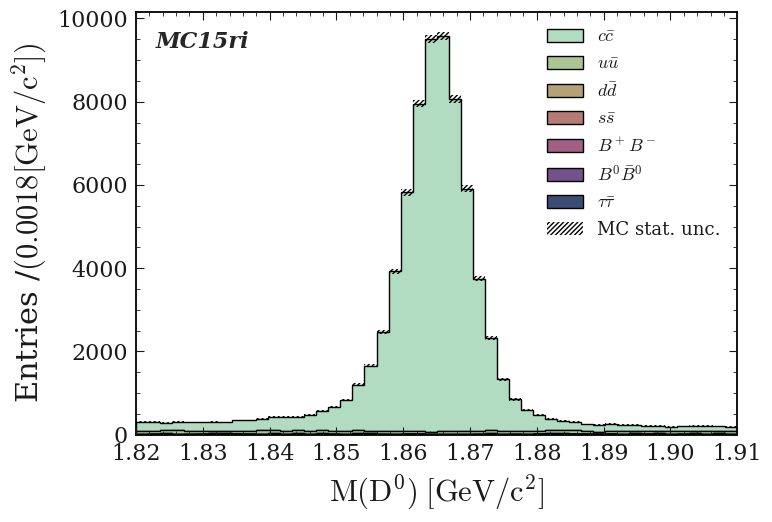

In [11]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1.82,1.91)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1)
plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/MC15ri_optv1_ref_rho_D0M.png")

In [93]:
pd_all_generic = pd.concat([pd_ccbar, pd_uubar, pd_ddbar, pd_ssbar, pd_charged, pd_mixed, pd_taupair], ignore_index=True)

pd_all_generic.describe()



,__experiment__,__run__,__event__,D0_M,Dstarp_Q,Dstarp_CMS_p,__ncandidates__,Dstarp_isSignal,Dstarp_chiProb,rank
count,64872.0,64872.0,6.487200e+04,64872.000000,64872.000000,64872.000000,64872.000000,64872.0,64872.000000,64872.000000
mean,1003.0,0.0,1.328824e+08,1.864307,0.005869,3.457482,1.003021,1.0,0.401152,1.000771
std,0.0,0.0,7.669078e+07,0.007325,0.000178,0.591082,0.054884,0.0,0.297908,0.027752
min,1003.0,0.0,1.084000e+03,1.820168,0.005430,2.500050,1.000000,1.0,0.001006,1.000000
25%,1003.0,0.0,6.693512e+07,1.861257,0.005755,2.965697,1.000000,1.0,0.128671,1.000000
50%,1003.0,0.0,1.326916e+08,1.864789,0.005862,3.400135,1.000000,1.0,0.358103,1.000000
75%,1003.0,0.0,1.994268e+08,1.868126,0.005974,3.905812,1.000000,1.0,0.647256,1.000000
max,1003.0,0.0,2.657920e+08,1.909998,0.006429,4.899085,2.000000,1.0,0.999922,2.000000


In [50]:
pd_all_generic = pd.concat([pd_ccbar, pd_uubar, pd_ddbar, pd_ssbar, pd_charged, pd_mixed, pd_taupair], ignore_index=True)

pd_all_generic.describe()



,__experiment__,__run__,__event__,D0_M,Dstarp_Q,Dstarp_CMS_p,__ncandidates__,Dstarp_isSignal,Dstarp_chiProb,rank
count,9212.0,9212.0,9.212000e+03,9212.000000,9212.000000,9212.000000,9212.000000,8271.0,9212.000000,9212.000000
mean,1003.0,0.0,1.321085e+08,1.863810,0.005934,3.089741,1.014329,0.0,0.342311,1.002171
std,0.0,0.0,8.461718e+07,0.019340,0.000284,0.487685,0.118850,0.0,0.296586,0.046547
min,1003.0,0.0,1.806200e+04,1.830005,0.005430,2.500009,1.000000,0.0,0.001006,1.000000
25%,1003.0,0.0,5.819571e+07,1.847676,0.005690,2.704434,1.000000,0.0,0.072155,1.000000
50%,1003.0,0.0,1.258967e+08,1.863678,0.005936,2.967510,1.000000,0.0,0.268362,1.000000
75%,1003.0,0.0,2.035215e+08,1.879371,0.006176,3.358596,1.000000,0.0,0.568457,1.000000
max,1003.0,0.0,3.209922e+08,1.899980,0.006430,5.250282,2.000000,0.0,0.999718,2.000000


In [94]:
N_isSignal_1 = len(pd_all_generic.query('Dstarp_isSignal==1'))
print(N_isSignal_1)

64872


In [31]:
np_data = pd_all_generic['D0_M'].to_numpy()

# Fit D0 + D0bar only in ccbar

In [12]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/ref_optv1_sigext_ref_only_skim/'

loc_ccbar = base_file_loc + 'ccbar/recon_*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar = base_file_loc + 'uubar/recon_*.root'
loc_ddbar = base_file_loc + 'ddbar/recon_*.root'
loc_ssbar = base_file_loc + 'ssbar/recon_*.root'
loc_charged = base_file_loc + 'charged/recon_*.root'
loc_mixed = base_file_loc + 'mixed/recon_*.root'
loc_taupair = base_file_loc + 'taupair/recon_*.root'

In [13]:
loc_ccbar_cc = base_file_loc + 'ccbar/recon_*.root/ref_rho_cc'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar_cc  = base_file_loc + 'uubar/recon_*.root/ref_rho_cc'
loc_ddbar_cc  = base_file_loc + 'ddbar/recon_*.root/ref_rho_cc'
loc_ssbar_cc  = base_file_loc + 'ssbar/recon_*.root/ref_rho_cc'
loc_charged_cc  = base_file_loc + 'charged/recon_*.root/ref_rho_cc'
loc_mixed_cc  = base_file_loc + 'mixed/recon_*.root/ref_rho_cc'
loc_taupair_cc  = base_file_loc + 'taupair/recon_*.root/ref_rho_cc'

In [14]:
# file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]
file_list = [loc_ccbar,loc_ccbar_cc]

mychain = ROOT.TChain("ref_rho")
# mychain = ROOT.TChain("ref_rho_cc")
 
for i in file_list:
    mychain.Add(i)

In [15]:
# N_total = mychain.GetEntries()

In [36]:
fitting_region = (1.82, 1.91)
fitting_region = (1.84, 1.89)
# 
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
y = ROOT.RooRealVar("Dstarp_isSignal", "M(D^{0}) [GeV/c^{2}]", 0, 1, "")
# x.setBins(50)
# RooDataSet* data3 = new RooDataSet(“data3”,“data3”,sIeta,Import(*chain)) ;

# roodataset = ROOT.RooDataSet("roodataset","", x , ROOT.RooFit.Import(mychain), ROOT.RooFit.CutRange("D0_M>1.83 && D0_M<1.9"))
roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain), Cut="Dstarp_isSignal==1 ")
# roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain))



# roodataset = roodataset_i.reduce("D0_M>1.82 && D0_M<1.91 ")
roodataset = roodataset_i.reduce("D0_M>1.84 && D0_M<1.89 ")

roodataset.Print("v")

[#1] INFO:InputArguments -- The formula Dstarp_isSignal==1  claims to use the variables (D0_M,Dstarp_isSignal) but only (Dstarp_isSignal) seem to be in use.
  inputs:         Dstarp_isSignal==1 
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #5 because D0_M cannot accommodate the value 1.90857
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #6 because D0_M cannot accommodate the value 1.90269
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #8 because D0_M cannot accommodate the value 1.83995
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #41 because D0_M cannot accommodate the value 1.89918
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Ignored 10747 out-of-range events
[#1] INFO:InputArguments -- The formula D0_M>1.84 && D0_M<1.89  clai

[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit' created with bounds [1.84,1.89]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_model_roodataset_i) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'NormalizationRangeForfit' created with bounds [1.84,1.89]
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit_nll_sig_model_roodataset_i' created with bounds [1.84,1.89]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_model_roodataset_i) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **   28 **SET PRINT           1
 **********
 **********
 **   29 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


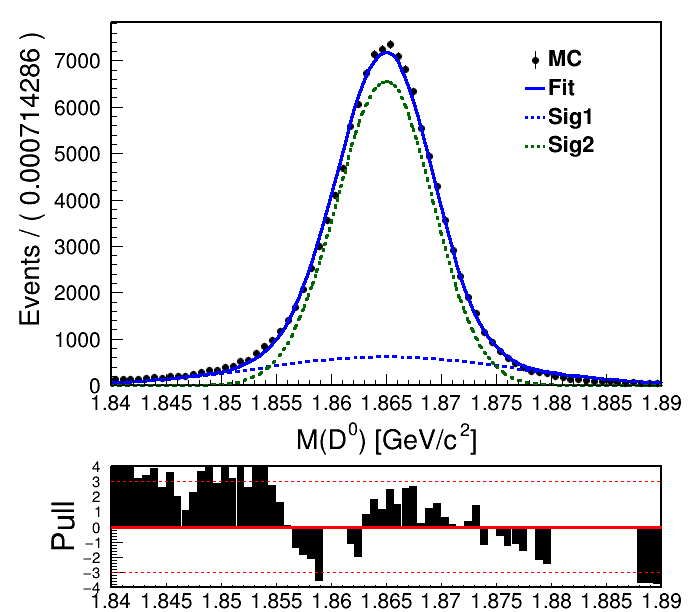

In [37]:

x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.87)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0.001,0.05)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.01,0.001,0.05)
sigma4 = ROOT.RooRealVar("sigma4", "width of gaussians", 0.01,0.001,0.05)

# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 20,0,100)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


# sig1 = ROOT.RooBreitWigner("sig1", "Signal component 1", x, mean, sigma1)

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)
sig2 = ROOT.RooBifurGauss("sig2", "Signal component 1", x, mean, sigma3,sigma4)


# sig2 = ROOT.RooBreitWigner("sig2", "Signal component 1", x, mean, sigma2)
# sig3 = ROOT.RooGaussian("sig3", "Signal component 1", x, mean, sigma3)

# RooBreitWigner (const char *name, const char *title, RooAbsReal &_x, RooAbsReal &_mean, RooAbsReal &_width)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)

# sig_model1 = ROOT.RooAddPdf("sig_model1", "Signal1", [sig1, sig2], sig1frac)
# sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig3, sig_model1], sig2frac)


sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)




# c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
# c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
# bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)

# bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, c0)

# tau = ROOT.RooRealVar("tau", "c1",-15, -20,0)
# bkg_x_model = ROOT.RooExponential("bkg_x_model", "Signal component 1", x, tau)



# data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

data = roodataset

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))



# nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.8,0,N_total)
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",N_total*0.2,0, N_total)


# nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

# extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg_x_model), ROOT.RooArgSet(nsig, nbkg))

# r = extended_model.fitTo(roodataset,NumCPU=12, Range=fitting_region)

# r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

r = sig_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig_model.fitTo(data,NumCPU=12, Range=(1.84,1.89))


# r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


# extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

# extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


# extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



# extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+3)

# extended_model.plotOn(frame, Name="fitting")

sig_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)
sig_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+3)
# sig_model.plotOn(frame, Name="sig3", Components=sig3, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)

sig_model.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.65, 0.90, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "Fit", "l")
leg1.AddEntry("sig1", "Sig1", "l")
leg1.AddEntry("sig2", "Sig2", "l")
leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

# Fit D0 + D0bar 

In [16]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/ref_optv1_sigext_ref_only_skim/'

loc_ccbar = base_file_loc + 'ccbar/recon_*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/r = sig_model.fitTo(data,NumCPU=12, Range=fitting_region)
loc_uubar = base_file_loc + 'uubar/recon_*.root'
loc_ddbar = base_file_loc + 'ddbar/recon_*.root'
loc_ssbar = base_file_loc + 'ssbar/recon_*.root'
loc_charged = base_file_loc + 'charged/recon_*.root'
loc_mixed = base_file_loc + 'mixed/recon_*.root'
loc_taupair = base_file_loc + 'taupair/recon_*.root'

In [17]:
loc_ccbar_cc = base_file_loc + 'ccbar/recon_*.root/ref_rho_cc'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar_cc  = base_file_loc + 'uubar/recon_*.root/ref_rho_cc'
loc_ddbar_cc  = base_file_loc + 'ddbar/recon_*.root/ref_rho_cc'
loc_ssbar_cc  = base_file_loc + 'ssbar/recon_*.root/ref_rho_cc'
loc_charged_cc  = base_file_loc + 'charged/recon_*.root/ref_rho_cc'
loc_mixed_cc  = base_file_loc + 'mixed/recon_*.root/ref_rho_cc'
loc_taupair_cc  = base_file_loc + 'taupair/recon_*.root/ref_rho_cc'

In [18]:
# file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]
file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair,\
            loc_ccbar_cc,loc_uubar_cc,loc_uubar_cc,loc_ssbar_cc,loc_charged_cc,loc_mixed_cc,loc_taupair_cc]

mychain = ROOT.TChain("ref_rho")
# mychain = ROOT.TChain("ref_rho_cc")
 
for i in file_list:
    mychain.Add(i)

In [19]:
# N_total = mychain.GetEntries()

In [20]:
fitting_region = (1.82, 1.91)
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
y = ROOT.RooRealVar("Dstarp_isSignal", "M(D^{0}) [GeV/c^{2}]", 0, 1, "")
# x.setBins(50)
# RooDataSet* data3 = new RooDataSet(“data3”,“data3”,sIeta,Import(*chain)) ;

# roodataset = ROOT.RooDataSet("roodataset","", x , ROOT.RooFit.Import(mychain), ROOT.RooFit.CutRange("D0_M>1.83 && D0_M<1.9"))
# roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain), Cut="Dstarp_isSignal==1 ")
roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain))



roodataset = roodataset_i.reduce("D0_M>1.82 && D0_M<1.91 ")
roodataset.Print("v")

[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #66 because D0_M cannot accommodate the value 1.93494
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #107 because D0_M cannot accommodate the value 1.92841
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #182 because D0_M cannot accommodate the value 1.92684
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #194 because D0_M cannot accommodate the value 1.93993
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Ignored 7420 out-of-range events
[#1] INFO:InputArguments -- The formula D0_M>1.82 && D0_M<1.91  claims to use the variables (D0_M,Dstarp_isSignal) but only (D0_M) seem to be in use.
  inputs:         D0_M>1.82 && D0_M<1.91 
DataStore roodataset_i ()
  Contains 154992 entries
  Observables:

In [21]:
N_total = roodataset.sumEntries()

In [22]:
N_total

154992.0

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_roodataset_i) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_roodataset_i) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::optimizeConstantTerms: set of constant parameters changed, rerunning const optimizer
 **********
 **   52 **SET PRINT           1
 **********
 **********
 **   53 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0           1.00000e-01  2.00000e-01   -1.00000e+00  1.00000e+00
     2 mean         1.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/references/ref_rho/FIT_ref_rho_MC15ri_1ab_DDbar_D0M.png has been created


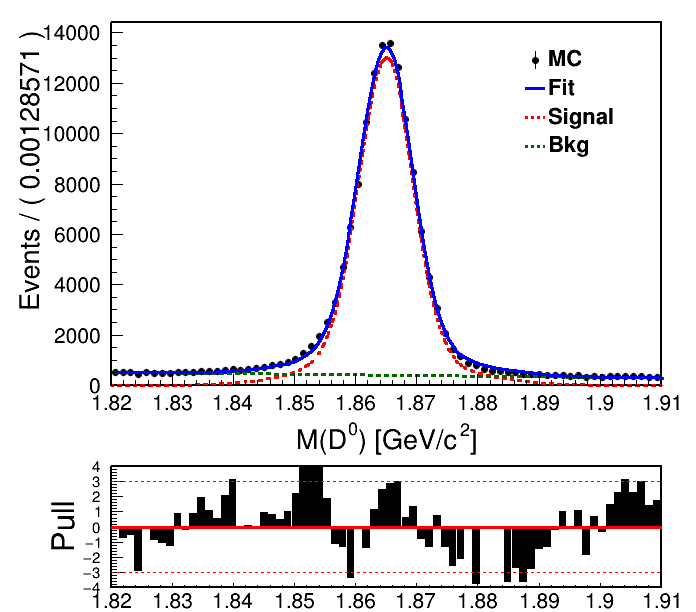

In [34]:

x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.87)
# sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0.001,0.05)
# sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.01,0.001,0.05)

# mean = ROOT.RooRealVar("mean", "mean of gaussians",1.86501,1.86501,1.86501 )
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 1.15101e-02,1.15101e-02,1.15101e-02)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 4.51711e-03,4.51711e-03,4.51711e-03)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 4.23601e-03,4.23601e-03,4.23601e-03)

# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 20,0,100)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)
sig2 = ROOT.RooBifurGauss("sig2", "Signal component 1", x, mean, sigma2,sigma3)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 1.94146e-01)

# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)




c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
# c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
# bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)

bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, c0)

# tau = ROOT.RooRealVar("tau", "c1",-15, -20,0)
# bkg_x_model = ROOT.RooExponential("bkg_x_model", "Signal component 1", x, tau)



# data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

data = roodataset

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))



nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.9,0,N_total)
nbkg = ROOT.RooRealVar("nbkg","# bkg events",N_total*0.1,0, N_total)


# nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg_x_model), ROOT.RooArgSet(nsig, nbkg))

# r = extended_model.fitTo(roodataset,NumCPU=12, Range=fitting_region)

r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

# r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


# extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

# extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+3)

extended_model.plotOn(frame, Name="fitting")





# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.65, 0.90, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "Fit", "l")
leg1.AddEntry("sig", "Signal", "l")
leg1.AddEntry("bkg", "Bkg", "l")
leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/references/ref_rho/FIT_ref_rho_MC15ri_1ab_DDbar_D0M.png")

In [35]:
print(mean)

RooRealVar::mean = 1.86508 +/- 1.6053e-05  L(1.85 - 1.87) 



In [36]:
print(nsig)
print(nbkg)


RooRealVar::nsig = 126153 +/- 383.083  L(0 - 154992) 

RooRealVar::nbkg = 28838.6 +/- 222.409  L(0 - 154992) 



In [30]:
print(nsig)
print(nbkg)


RooRealVar::nsig = 126153 +/- 383.083  L(0 - 154992) 

RooRealVar::nbkg = 28838.6 +/- 222.409  L(0 - 154992) 



# Fit D0 

In [37]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/ref_optv1_sigext_ref_only_skim/'

loc_ccbar = base_file_loc + 'ccbar/recon_*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/r = sig_model.fitTo(data,NumCPU=12, Range=fitting_region)
loc_uubar = base_file_loc + 'uubar/recon_*.root'
loc_ddbar = base_file_loc + 'ddbar/recon_*.root'
loc_ssbar = base_file_loc + 'ssbar/recon_*.root'
loc_charged = base_file_loc + 'charged/recon_*.root'
loc_mixed = base_file_loc + 'mixed/recon_*.root'
loc_taupair = base_file_loc + 'taupair/recon_*.root'

In [38]:
# loc_ccbar_cc = base_file_loc + 'ccbar/recon_*.root/ref_rho_cc'
# # loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
# loc_uubar_cc  = base_file_loc + 'uubar/recon_*.root/ref_rho_cc'
# loc_ddbar_cc  = base_file_loc + 'ddbar/recon_*.root/ref_rho_cc'
# loc_ssbar_cc  = base_file_loc + 'ssbar/recon_*.root/ref_rho_cc'
# loc_charged_cc  = base_file_loc + 'charged/recon_*.root/ref_rho_cc'
# loc_mixed_cc  = base_file_loc + 'mixed/recon_*.root/ref_rho_cc'
# loc_taupair_cc  = base_file_loc + 'taupair/recon_*.root/ref_rho_cc'

In [39]:
# file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]
file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]
mychain = ROOT.TChain("ref_rho")
# mychain = ROOT.TChain("ref_rho_cc")
 
for i in file_list:
    mychain.Add(i)

In [40]:
# N_total = mychain.GetEntries()

In [41]:
fitting_region = (1.82, 1.91)
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
y = ROOT.RooRealVar("Dstarp_isSignal", "M(D^{0}) [GeV/c^{2}]", 0, 1, "")
# x.setBins(50)
# RooDataSet* data3 = new RooDataSet(“data3”,“data3”,sIeta,Import(*chain)) ;

# roodataset = ROOT.RooDataSet("roodataset","", x , ROOT.RooFit.Import(mychain), ROOT.RooFit.CutRange("D0_M>1.83 && D0_M<1.9"))
# roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain), Cut="Dstarp_isSignal==1 ")
roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain))



roodataset = roodataset_i.reduce("D0_M>1.82 && D0_M<1.91 ")
roodataset.Print("v")

[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #66 because D0_M cannot accommodate the value 1.93494
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #107 because D0_M cannot accommodate the value 1.92841
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #182 because D0_M cannot accommodate the value 1.92684
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #194 because D0_M cannot accommodate the value 1.93993
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Ignored 3810 out-of-range events
[#1] INFO:InputArguments -- The formula D0_M>1.82 && D0_M<1.91  claims to use the variables (D0_M,Dstarp_isSignal) but only (D0_M) seem to be in use.
  inputs:         D0_M>1.82 && D0_M<1.91 
DataStore roodataset_i ()
  Contains 79039 entries
  Observables: 

In [42]:
N_total = roodataset.sumEntries()

In [43]:
N_total

79039.0

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit' created with bounds [1.82,1.91]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_roodataset_i) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'NormalizationRangeForfit' created with bounds [1.82,1.91]
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit_nll_extended_model_roodataset_i' created with bounds [1.82,1.91]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_roodataset_i) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::optimizeConst

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/references/ref_rho/FIT_ref_rho_MC15ri_1ab_D0_D0M.png has been created


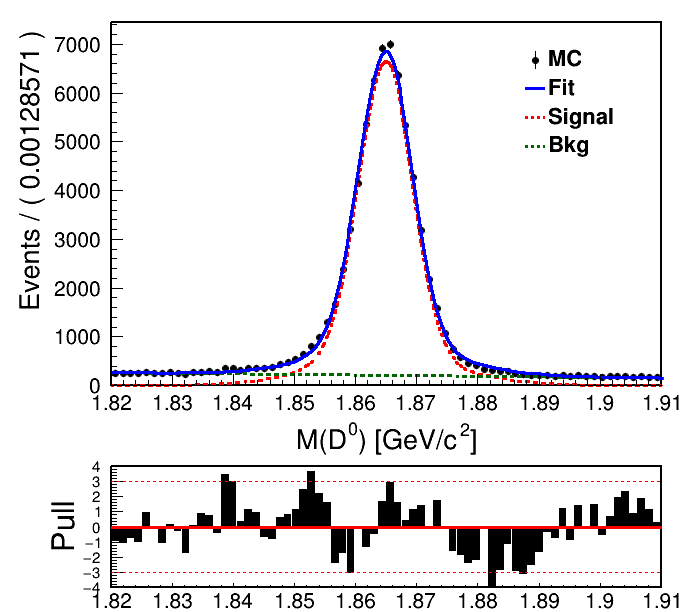

In [44]:

x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


# mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.87)
# sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0.001,0.05)
# sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.01,0.001,0.05)

mean = ROOT.RooRealVar("mean", "mean of gaussians",1.86501,1.86501,1.86501 )
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 1.15101e-02,1.15101e-02,1.15101e-02)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 4.51711e-03,4.51711e-03,4.51711e-03)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 4.23601e-03,4.23601e-03,4.23601e-03)

# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 20,0,100)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)
sig2 = ROOT.RooBifurGauss("sig2", "Signal component 1", x, mean, sigma2,sigma3)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 1.94146e-01)

# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)




c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
# c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
# bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)

bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, c0)

# tau = ROOT.RooRealVar("tau", "c1",-15, -20,0)
# bkg_x_model = ROOT.RooExponential("bkg_x_model", "Signal component 1", x, tau)



# data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

data = roodataset

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))



nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.9,0,N_total)
nbkg = ROOT.RooRealVar("nbkg","# bkg events",N_total*0.1,0, N_total)


# nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg_x_model), ROOT.RooArgSet(nsig, nbkg))

# r = extended_model.fitTo(roodataset,NumCPU=12, Range=fitting_region)

r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

# r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


# extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

# extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+3)

extended_model.plotOn(frame, Name="fitting")





# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.65, 0.90, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "Fit", "l")
leg1.AddEntry("sig", "Signal", "l")
leg1.AddEntry("bkg", "Bkg", "l")
leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/references/ref_rho/FIT_ref_rho_MC15ri_1ab_D0_D0M.png")

In [46]:
print(nsig)
print(nbkg)


RooRealVar::nsig = 64411.2 +/- 273.72  L(0 - 79039) 

RooRealVar::nbkg = 14627.6 +/- 158.574  L(0 - 79039) 



In [86]:
# N_true = 64878.0

# Fit D0bar

In [47]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/ref_optv1_sigext_ref_only_skim/'

loc_ccbar = base_file_loc + 'ccbar/recon_*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/r = sig_model.fitTo(data,NumCPU=12, Range=fitting_region)
loc_uubar = base_file_loc + 'uubar/recon_*.root'
loc_ddbar = base_file_loc + 'ddbar/recon_*.root'
loc_ssbar = base_file_loc + 'ssbar/recon_*.root'
loc_charged = base_file_loc + 'charged/recon_*.root'
loc_mixed = base_file_loc + 'mixed/recon_*.root'
loc_taupair = base_file_loc + 'taupair/recon_*.root'

In [48]:
# file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]
file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]
mychain = ROOT.TChain("ref_rho_cc")
 
for i in file_list:
    mychain.Add(i)

In [49]:
# N_total = mychain.GetEntries()

In [50]:
fitting_region = (1.82, 1.91)
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
y = ROOT.RooRealVar("Dstarp_isSignal", "M(D^{0}) [GeV/c^{2}]", 0, 1, "")
# x.setBins(50)
# RooDataSet* data3 = new RooDataSet(“data3”,“data3”,sIeta,Import(*chain)) ;

# roodataset = ROOT.RooDataSet("roodataset","", x , ROOT.RooFit.Import(mychain), ROOT.RooFit.CutRange("D0_M>1.83 && D0_M<1.9"))
# roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain), Cut="Dstarp_isSignal==1 ")
roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain))



roodataset = roodataset_i.reduce("D0_M>1.82 && D0_M<1.91 ")
roodataset.Print("v")

[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #1 because D0_M cannot accommodate the value 1.91431
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #99 because D0_M cannot accommodate the value 1.93644
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #145 because D0_M cannot accommodate the value 1.92296
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #155 because D0_M cannot accommodate the value 1.93145
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Ignored 3610 out-of-range events
[#1] INFO:InputArguments -- The formula D0_M>1.82 && D0_M<1.91  claims to use the variables (D0_M,Dstarp_isSignal) but only (D0_M) seem to be in use.
  inputs:         D0_M>1.82 && D0_M<1.91 
DataStore roodataset_i ()
  Contains 75953 entries
  Observables: 
 

In [51]:
N_total = roodataset.sumEntries()

In [52]:
N_total

75953.0

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit' created with bounds [1.82,1.91]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_roodataset_i) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'NormalizationRangeForfit' created with bounds [1.82,1.91]
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit_nll_extended_model_roodataset_i' created with bounds [1.82,1.91]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_roodataset_i) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::optimizeConst

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/references/ref_rho/FIT_ref_rho_MC15ri_1ab_D0bar_D0M.png has been created


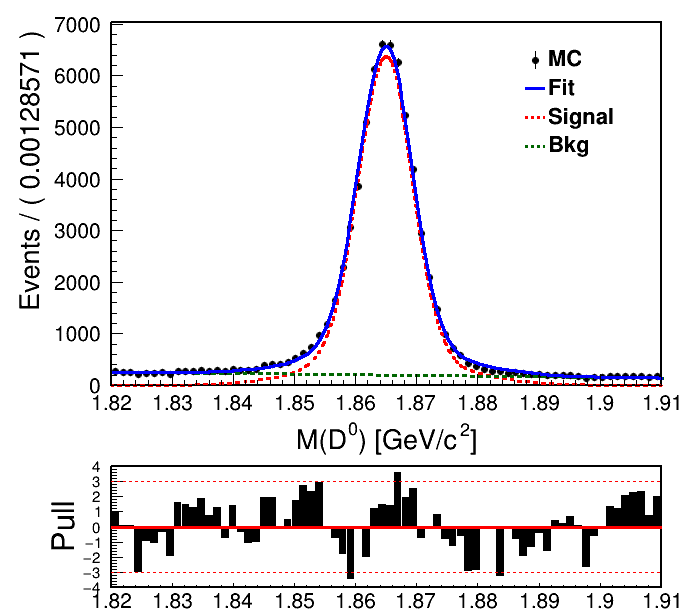

In [53]:

x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


# mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.87)
# sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0.001,0.05)
# sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.01,0.001,0.05)

mean = ROOT.RooRealVar("mean", "mean of gaussians",1.86501,1.86501,1.86501 )
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 1.15101e-02,1.15101e-02,1.15101e-02)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 4.51711e-03,4.51711e-03,4.51711e-03)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 4.23601e-03,4.23601e-03,4.23601e-03)

# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 20,0,100)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)
sig2 = ROOT.RooBifurGauss("sig2", "Signal component 1", x, mean, sigma2,sigma3)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 1.94146e-01)

# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)




c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
# c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
# bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)

bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, c0)

# tau = ROOT.RooRealVar("tau", "c1",-15, -20,0)
# bkg_x_model = ROOT.RooExponential("bkg_x_model", "Signal component 1", x, tau)



# data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

data = roodataset

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))



nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.9,0,N_total)
nbkg = ROOT.RooRealVar("nbkg","# bkg events",N_total*0.1,0, N_total)


# nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg_x_model), ROOT.RooArgSet(nsig, nbkg))

# r = extended_model.fitTo(roodataset,NumCPU=12, Range=fitting_region)

r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

# r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


# extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

# extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+3)

extended_model.plotOn(frame, Name="fitting")





# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.65, 0.90, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "Fit", "l")
leg1.AddEntry("sig", "Signal", "l")
leg1.AddEntry("bkg", "Bkg", "l")
leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/references/ref_rho/FIT_ref_rho_MC15ri_1ab_D0bar_D0M.png")

In [54]:
print(nsig)
print(nbkg)


RooRealVar::nsig = 61758.5 +/- 268.05  L(0 - 75953) 

RooRealVar::nbkg = 14194.1 +/- 155.862  L(0 - 75953) 



In [55]:
# true_sig = 62261.0